# Problema de asignación

En los problemas de asignación se busca resolver minimizar la siguiente función objetivo:
$$F.O.: \sum_{i}^{i=n}\sum_{j}^{j=m} c_{i,j}x_{i,j}$$

Y las restricciones son las siguientes:
- $\sum_{j=1}^{j=m}x_{i,j} = 1$ para cada $i$. La suma de cada fila debe ser igual a 1
- $\sum_{i=1}^{i=n}x_{i,j} = 1$ para cada $j$. La suma de cada columna debe ser igual a 1
- $\sum_{i=1}^{i=n} \sum_{j=1}^{j=m} x_{i,j} \geq 0$. Todas las variables deben ser positivas

In [1]:
from gamspy import Container, Set, Parameter, Variable, Equation, Model, Sum, Sense
import matplotlib.pyplot as plt
from utils import visualize

## Enunciado 1

Problema dado por el profesor

Enunciado:

La Junta Administradora Local (JAL) de la comuna X tiene tres proyectos de pavimentación de vías. La junta tiene el problema de determinar que contratista llevara a cabo los proyectos. Se abrió licitación para los proyectos, entre contratistas locales, tres presentaron diligenciados sus pliegos. El costo de cada proyecto según la propuesta de cada contratista se presenta en la siguiente tabla (en millones de u.m.).

|               | Proyecto 1 | Proyecto 2 | Proyecto 3 |
| ------------- | ---------- | ---------- | ---------- |
| Contratista 1 |    280     |    320     |    360     |
| Contratista 2 |    360     |    280     |    300     |
| Contratista 3 |    380     |    340     |    400     |

Resultado esperado:
|               |   Proyecto 1   |   Proyecto 2   |   Proyecto 3   |
| ------------- | -------------- | -------------- | -------------- |
| Contratista 1 |     **0**      |       40       |       60       |
| Contratista 2 |      80        |       0        |     **0**      |
| Contratista 3 |      40        |     **0**      |       40       |

Aquellos **0** que están en negrita, son los de la solución

In [2]:
container = Container()

In [3]:
contractors = Set(container=container, name="contractors", records=["C1", "C2", "C3"])
projects = Set(container=container, name="projects", records=["P1", "P2", "P3"])

contractors, projects

(Set(name='contractors', domain=['*']), Set(name='projects', domain=['*']))

In [4]:
project_cost = Parameter(
    container=container,
    name="project_cost",
    domain=[contractors, projects],
    records=[
        ["C1", "P1", 280], ["C1", "P2", 320], ["C1", "P3", 360],
        ["C2", "P1", 360], ["C2", "P2", 280], ["C2", "P3", 300],
        ["C3", "P1", 380], ["C3", "P2", 340], ["C3", "P3", 400]
    ]
)

project_cost

Parameter(name='project_cost', domain=[Set(name='contractors', domain=['*']), Set(name='projects', domain=['*'])])

In [5]:
x = Variable(
    container=container,
    name="x",
    domain=[contractors, projects],
    type="Positive"
)

x

Variable(name='x', domain=[Set(name='contractors', domain=['*']), Set(name='projects', domain=['*'])], type='positive')

In [6]:
contractor_constraint = Equation(container=container, name="contractor_constraint", domain=contractors)
project_constraint = Equation(container=container, name="project_constraint", domain=projects)

contractor_constraint[contractors] = Sum(projects, x[contractors, projects]) == 1
project_constraint[projects] = Sum(contractors, x[contractors, projects]) == 1
objective = Sum((contractors, projects), project_cost[contractors, projects] * x[contractors, projects])

contractor_constraint, project_constraint, objective

(Equation(name='contractor_constraint', type='eq', domain=[Set(name='contractors', domain=['*'])]),
 Equation(name='project_constraint', type='eq', domain=[Set(name='projects', domain=['*'])]),
 Sum(domain=[], expression=Expression(left=ImplicitParameter(parent=Parameter(name='project_cost', domain=[Set(name='contractors', domain=['*']), Set(name='projects', domain=['*'])]), name='project_cost', domain=[Set(name='contractors', domain=['*']), Set(name='projects', domain=['*'])], permutation=None), parent_scalar_domains=[]), data=*, right=ImplicitVariable(parent=Variable(name='x', domain=[Set(name='contractors', domain=['*']), Set(name='projects', domain=['*'])], type='positive'), name='x', domain=[Set(name='contractors', domain=['*']), Set(name='projects', domain=['*'])], permutation=None, parent_scalar_domains=[]))))

In [7]:
assignment = Model(
    container=container,
    name="assignment",
    objective=objective,
    sense=Sense.MIN,
    equations=container.getEquations(),
    problem="LP"
)

assignment

Model(name='assignment', problem='LP', equations=[Equation(name='contractor_constraint', type='eq', domain=[Set(name='contractors', domain=['*'])]), Equation(name='project_constraint', type='eq', domain=[Set(name='projects', domain=['*'])]), Equation(name='assignment_objective', type='eq', domain=[])], sense='MIN', objective=Variable(name='assignment_objective_variable', domain=[], type='free'), matches=None, limited_variables=None

In [8]:
container.getEquations()

[Equation(name='contractor_constraint', type='eq', domain=[Set(name='contractors', domain=['*'])]),
 Equation(name='project_constraint', type='eq', domain=[Set(name='projects', domain=['*'])]),
 Equation(name='assignment_objective', type='eq', domain=[])]

In [9]:
assignment.solve()

,Solver Status,Model Status,Objective,Num of Equations,Num of Variables,Model Type,Solver,Solver Time
0,Normal,OptimalGlobal,920,7,10,LP,CPLEX,0


In [10]:
x.records.pivot(index='contractors', columns='projects', values='level')

projects,P1,P2,P3
contractors,,,
C1,1.0,0.0,0.0
C2,0.0,0.0,1.0
C3,0.0,1.0,0.0


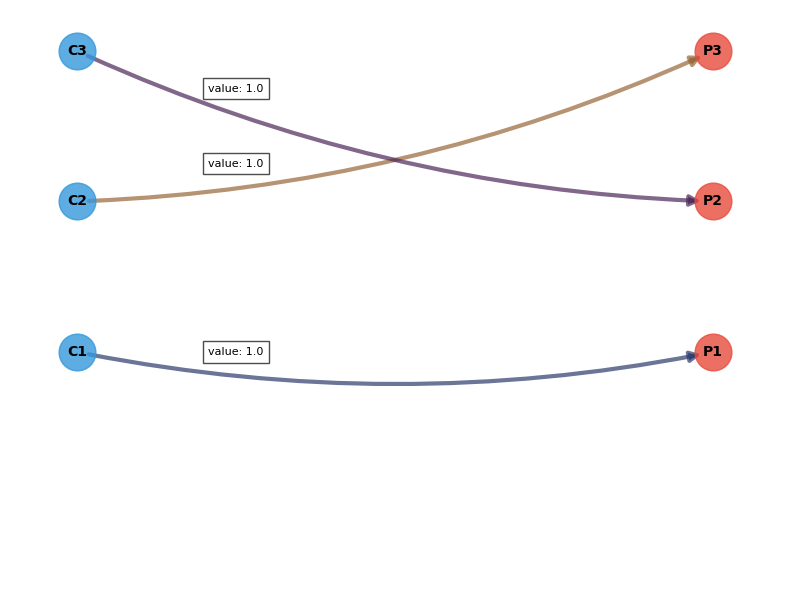

In [11]:
fig, ax = visualize(
    data=x.records,
    index='contractors',
    columns='projects',
    values='level',
    figsize=(8, 6)
)
plt.show()

## Enunciado 2

Enunciado:

Un bufete de abogados ha aceptado cinco nuevos casos, cada uno de los cuales puede ser llevado adecuadamente por cualquiera de los cinco asociados más recientes. Debido a la diferencia en experiencia y práctica, los abogados emplearán distintos tiempos en sus casos. Uno de los asociados más experimentados ha estimado las necesidades de tiempo (en horas) como sigue: 

|           | Caso 1 | Caso 2 | Caso 3 | Caso 4 | Caso 5 |
| --------- | ------ | ------ | ------ | ------ | ------ |
| Abogado 1 |  145   |  122   |  130   |   95   |  115   |
| Abogado 2 |   80   |   63   |   85   |   48   |   78   |
| Abogado 3 |  121   |  107   |   93   |   69   |   95   |
| Abogado 4 |  118   |   83   |  116   |   80   |  105   |
| Abogado 5 |   97   |   75   |  120   |   80   |  111   |

Determinar la forma óptima de asignar los casos a los abogados, de manera que 
cada uno de ellos se dedique a un caso diferente y que el tiempo total de horas 
empleadas sea mínimo.


Respuesta esperada:

|           | Caso 1 | Caso 2 | Caso 3 | Caso 4 | Caso 5 |
| --------- | ------ | ------ | ------ | ------ | ------ |
| Abogado 1 |   0    |   0    |   0    |   0    |   1    |
| Abogado 2 |   0    |   0    |   0    |   1    |   0    |
| Abogado 3 |   0    |   0    |   1    |   0    |   0    |
| Abogado 4 |   0    |   1    |   0    |   0    |   0    |
| Abogado 5 |   1    |   0    |   0    |   0    |   1    |


Ejercicio sacado de: [https://www.uv.es/~sala/CUADERN.pdf](https://www.uv.es/~sala/CUADERN.pdf). Páginas desde la 131 hasta la 135

In [12]:
container = Container()

In [13]:
lawyers = Set(container=container, name="lawyers", records=["A1", "A2", "A3", "A4", "A5"])
cases = Set(container=container, name="cases", records=["C1", "C2", "C3", "C4", "C5"])

lawyers, cases

(Set(name='lawyers', domain=['*']), Set(name='cases', domain=['*']))

In [14]:
hours = Parameter(
    container=container,
    name="hours",
    domain=[lawyers, cases],
    records=[
        ["A1", "C1", 145], ["A1", "C2", 122], ["A1", "C3", 130], ["A1", "C4", 95], ["A1", "C5", 115],
        ["A2", "C1", 80], ["A2", "C2", 63], ["A2", "C3", 85], ["A2", "C4", 48], ["A2", "C5", 78],
        ["A3", "C1", 121], ["A3", "C2", 107], ["A3", "C3", 93], ["A3", "C4", 69], ["A3", "C5", 95],
        ["A4", "C1", 118], ["A4", "C2", 83], ["A4", "C3", 116], ["A4", "C4", 80], ["A4", "C5", 105],
        ["A5", "C1", 97], ["A5", "C2", 75], ["A5", "C3", 120], ["A5", "C4", 80], ["A5", "C5", 111],
    ]
)

hours

Parameter(name='hours', domain=[Set(name='lawyers', domain=['*']), Set(name='cases', domain=['*'])])

In [15]:
x = Variable(
    container=container,
    name="x",
    domain=[lawyers, cases],
    type="Positive"
)

x

Variable(name='x', domain=[Set(name='lawyers', domain=['*']), Set(name='cases', domain=['*'])], type='positive')

In [16]:
lawyer_constraint = Equation(container=container, name="lawyer_constraint", domain=lawyers)
case_constraint = Equation(container=container, name="case_constraint", domain=cases)

lawyer_constraint[lawyers] = Sum(cases, x[lawyers, cases]) == 1
case_constraint[cases] = Sum(lawyers, x[lawyers, cases]) == 1
objective = Sum((lawyers, cases), hours[lawyers, cases] * x[lawyers, cases])

lawyer_constraint, case_constraint, objective

(Equation(name='lawyer_constraint', type='eq', domain=[Set(name='lawyers', domain=['*'])]),
 Equation(name='case_constraint', type='eq', domain=[Set(name='cases', domain=['*'])]),
 Sum(domain=[], expression=Expression(left=ImplicitParameter(parent=Parameter(name='hours', domain=[Set(name='lawyers', domain=['*']), Set(name='cases', domain=['*'])]), name='hours', domain=[Set(name='lawyers', domain=['*']), Set(name='cases', domain=['*'])], permutation=None), parent_scalar_domains=[]), data=*, right=ImplicitVariable(parent=Variable(name='x', domain=[Set(name='lawyers', domain=['*']), Set(name='cases', domain=['*'])], type='positive'), name='x', domain=[Set(name='lawyers', domain=['*']), Set(name='cases', domain=['*'])], permutation=None, parent_scalar_domains=[]))))

In [17]:
assignment = Model(
    container=container,
    name="assignment",
    objective=objective,
    sense=Sense.MIN,
    equations=container.getEquations(),
    problem="LP"
)

assignment

Model(name='assignment', problem='LP', equations=[Equation(name='lawyer_constraint', type='eq', domain=[Set(name='lawyers', domain=['*'])]), Equation(name='case_constraint', type='eq', domain=[Set(name='cases', domain=['*'])]), Equation(name='assignment_objective', type='eq', domain=[])], sense='MIN', objective=Variable(name='assignment_objective_variable', domain=[], type='free'), matches=None, limited_variables=None

In [18]:
assignment.solve()

,Solver Status,Model Status,Objective,Num of Equations,Num of Variables,Model Type,Solver,Solver Time
0,Normal,OptimalGlobal,436,11,26,LP,CPLEX,0


In [19]:
x.records.pivot(index='lawyers', columns='cases', values='level')

cases,C1,C2,C3,C4,C5
lawyers,,,,,
A1,0.0,0.0,0.0,0.0,1.0
A2,0.0,0.0,0.0,1.0,0.0
A3,0.0,0.0,1.0,0.0,0.0
A4,0.0,1.0,0.0,0.0,0.0
A5,1.0,0.0,0.0,0.0,0.0


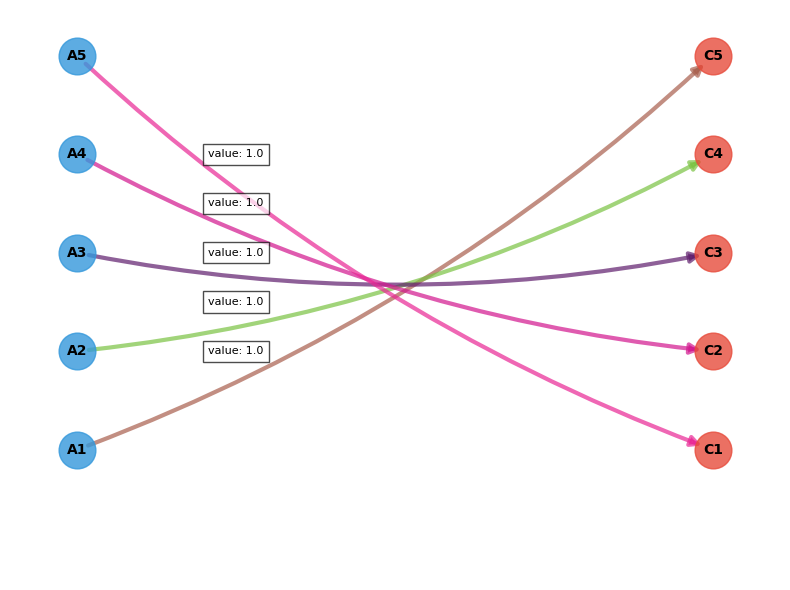

In [20]:
fig, ax = visualize(
    data=x.records,
    index='lawyers',
    columns='cases',
    values='level',
    figsize=(8, 6)
)
plt.show()